# Processing combined segments

## Gathering basic datasets

We'll set ourselves up with a basic function to read and optionally save a dataframe

In [25]:
import geopandas as gpd

def read_open_dataframe(url, file_name=None):
    df = gpd.read_file(url)
    if file_name is not None:
        df.to_file(file_name, driver='GeoJSON')
    return df

We'll read in the street segments

In [ ]:
streets = read_open_dataframe(
  'https://opendata.arcgis.com/datasets/ad5ed4193110452aac2d9485df3298e2_68.geojson',
  '../.data/street_segments.geojson'
)

We'll filter streets down to only those of certain types that make up segments that are lower class than a freeway and bigger than a minor residential.

In [26]:
streets = streets[streets['TYPE'].isin([1300, 1321, 1400, 1421, 1450, 1471])]

Then, we'll read in the bicycle network

In [28]:
# Can't save the bike network yet since some geometry is malformed
bike_network = read_open_dataframe(
    "https://opendata.arcgis.com/datasets/dbd6b5aa0ab14c859874eb41000e6a56_75.geojson"
)

We'll filter down the bike_network to only those that we are interested in: Active trails

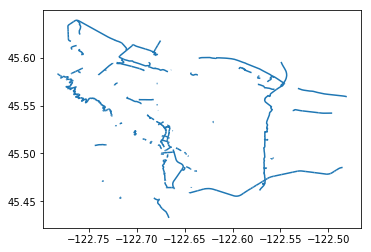

In [38]:
bike_network = bike_network[bike_network['Status'] == 'Active']
bike_network = bike_network[bike_network['Facility'] == 'Off-Street Paths/Trails']
bike_network.plot()

We will trim these down to just the midpoint of the line geometry

In [39]:
streets.geometry = streets.geometry.interpolate(0.5, normalized=True)
bike_network.geometry = bike_network.interpolate(0.5, normalized=True)

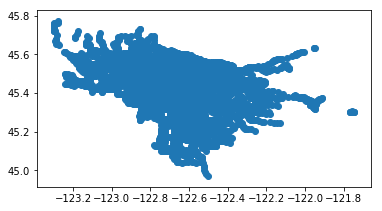

In [40]:
streets.plot()

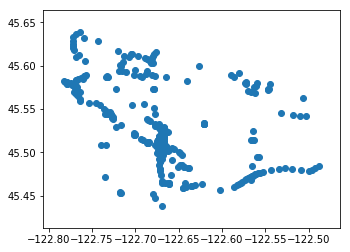

In [41]:
bike_network.plot()

Let's clean up the columns a bit...

In [45]:
streets = streets[['FULL_NAME', 'geometry']]
streets = streets.rename(index=str, columns={"FULL_NAME": "name"})
streets.head()

,name,geometry
4,NW BROADWAY,POINT (-122.6776160529759 45.52768417667291)
11,SE CLATSOP ST,POINT (-122.5245687848956 45.46127391776403)
22,SW GARDEN HOME RD,POINT (-122.7446068876164 45.4656802013666)
123,NW SKYLINE BLVD,POINT (-122.7981387983939 45.58058331478398)
127,NW SKYLINE BLVD,POINT (-122.7952966986207 45.57815267653617)


In [48]:
len(streets)

22709

In [46]:
bike_network = bike_network[['SegmentName', 'geometry']]
bike_network = bike_network.rename(index=str, columns={"SegmentName": "name"})
bike_network.head()

,name,geometry
34,N LOMBARD ST,POINT (-122.7717031461288 45.62852104326291)
35,N LOMBARD ST,POINT (-122.7713854726491 45.62056059191839)
178,NW LEIF ERIKSON DR,POINT (-122.7268688970905 45.54146992306962)
210,SW PEDESTRIAN TRL,POINT (-122.68476598013 45.51194980927482)
218,SW LEWIS AND CLARK CIR,POINT (-122.7007260908647 45.52117350218415)


In [49]:
len(bike_network)

333

We'll need pandas to do some operations now

In [47]:
import pandas as pd

In [50]:
frames = [streets, bike_network]
result = pd.concat(frames)

In [51]:
len(result)

23042

In [53]:
result.to_file('../.data/combined_filtered_segment_midpoints.geojson', driver='GeoJSON')